In [2]:
import pandas as pd

# Load dataset (corrected path)
df = pd.read_csv("data/raw/adult.csv")

# Shape and preview
print(df.shape)
df.head()

(48842, 15)


age  workclass  fnlwgt     education  education_num      marital_status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital_gain  capital_loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours_per_week native_country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
# Info about columns and data types
df.info()

# Missing values count
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [8]:
df["income"].value_counts(normalize=True)*100


income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64

In [14]:
df.describe().T


count           mean            std      min       25%  \
age             48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt          48842.0  189664.134597  105604.025423  12285.0  117550.5   
education_num   48842.0      10.078089       2.570973      1.0       9.0   
capital_gain    48842.0    1079.067626    7452.019058      0.0       0.0   
capital_loss    48842.0      87.502314     403.004552      0.0       0.0   
hours_per_week  48842.0      40.422382      12.391444      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178144.5  237642.0  1490400.0  
education_num       10.0      12.0       16.0  
capital_gain         0.0       0.0    99999.0  
capital_loss         0.0       0.0     4356.0  
hours_per_week      40.0      45.0       99.0

In [15]:
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



Column: workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Column: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
Name: count, dtype: int64

Column: marital_status
marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service      

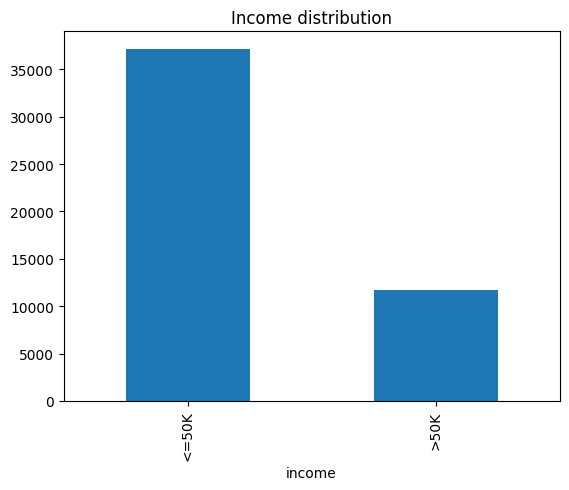

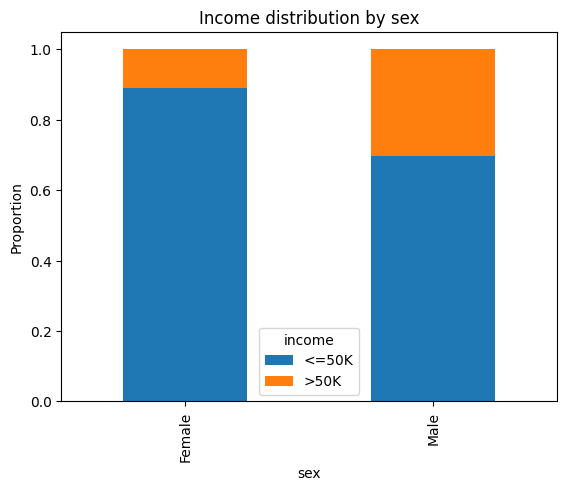

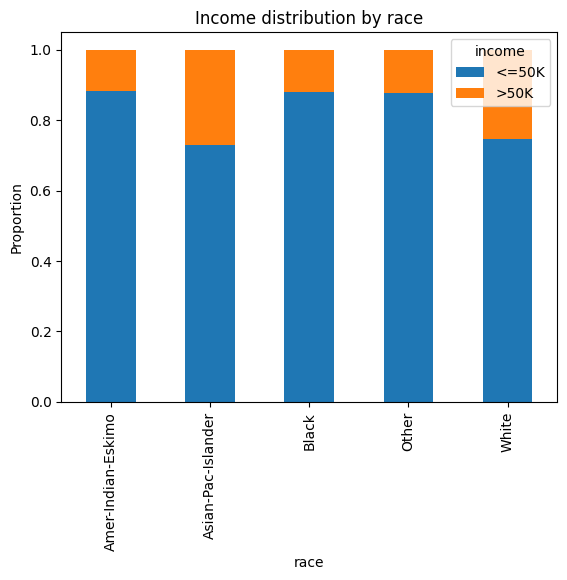

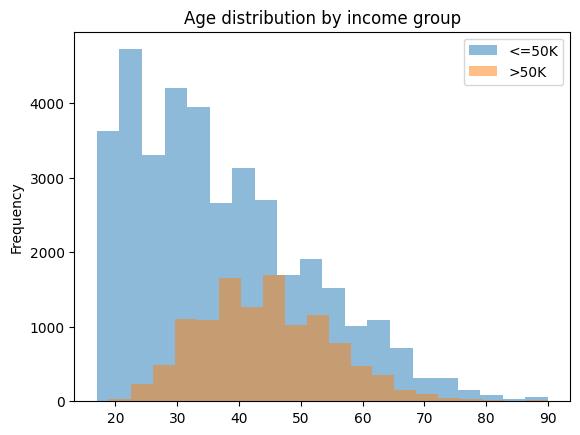

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Income distribution
df["income"].value_counts().plot(kind="bar", title="Income distribution")
plt.show()

# Sex vs Income
pd.crosstab(df["sex"], df["income"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Income distribution by sex")
plt.ylabel("Proportion")
plt.show()

# Race vs Income
pd.crosstab(df["race"], df["income"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Income distribution by race")
plt.ylabel("Proportion")
plt.show()

# Age vs Income
df.groupby("income")["age"].plot(kind="hist", legend=True, alpha=0.5, bins=20)
plt.title("Age distribution by income group")
plt.show()


Data Dictionary

age: Age of individual

workclass: Employment type (Private, Self-emp, etc.)

education: Education level

education_num: Years of education

marital_status: Marital status

occupation: Job type

relationship: Family relationship

race: Race of individual

sex: Male/Female

capital_gain: Investment gains

capital_loss: Investment losses

hours_per_week: Weekly working hours

native_country: Country of origin

income: Target variable (<=50K or >50K)

Key Observations (so far)

Dataset is imbalanced (~75% <=50K).

Sex shows disparity: males more likely to earn >50K.

Race categories show income differences.

age and hours_per_week positively correlate with >50K income.

In [17]:
df.isna().mean().sort_values(ascending=False)


occupation        0.057512
workclass         0.057307
native_country    0.017546
age               0.000000
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
income            0.000000
dtype: float64

In [24]:
# Create a numeric version of income for correlation analysis
df_numeric = df.copy()
df_numeric['income_numeric'] = (df['income'] == '>50K').astype(int)

# Calculate correlations with the numeric income variable
correlations = df_numeric.corr(numeric_only=True)['income_numeric'].sort_values(ascending=False)
print("Correlations with income (>50K = 1, <=50K = 0):")
print(correlations)

Correlations with income (>50K = 1, <=50K = 0):
income_numeric    1.000000
education_num     0.332613
age               0.230369
hours_per_week    0.227687
capital_gain      0.223013
capital_loss      0.147554
fnlwgt           -0.006339
Name: income_numeric, dtype: float64


In [25]:
# Cross-tab sex & race vs income
pd.crosstab([df["sex"], df["race"]], df["income"], normalize="index").head(10)


income                        <=50K      >50K
sex    race                                  
Female Amer-Indian-Eskimo  0.918919  0.081081
       Asian-Pac-Islander  0.866538  0.133462
       Black               0.942808  0.057192
       Other               0.929032  0.070968
       White               0.881630  0.118370
Male   Amer-Indian-Eskimo  0.859649  0.140351
       Asian-Pac-Islander  0.660679  0.339321
       Black               0.817417  0.182583
       Other               0.844622  0.155378
       White               0.684531  0.315469

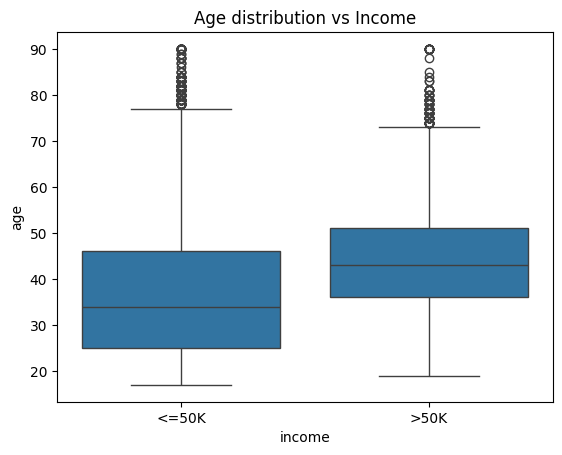

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="income", y="age", data=df)
plt.title("Age distribution vs Income")
plt.show()

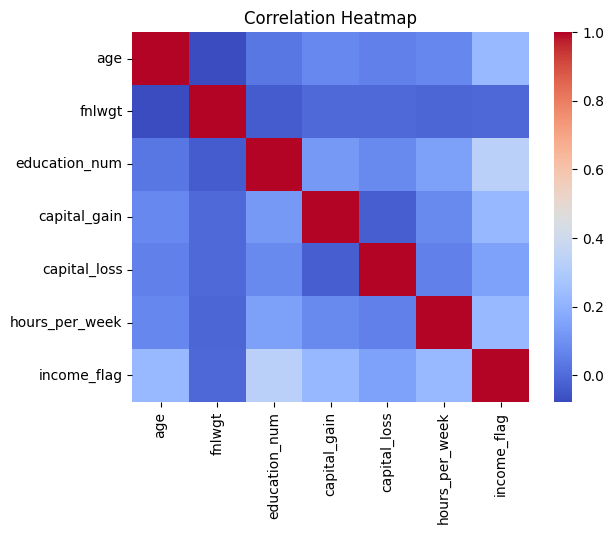

In [5]:
import seaborn as sns

numeric_df = df.copy()
numeric_df["income_flag"] = (df["income"] == ">50K").astype(int)

corr = numeric_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
df.nunique().sort_values()


sex                   2
income                2
race                  5
relationship          6
marital_status        7
workclass             8
occupation           14
education            16
education_num        16
native_country       41
age                  74
hours_per_week       96
capital_loss         99
capital_gain        123
fnlwgt            28523
dtype: int64

In [6]:
df["income_flag"] = (df["income"] == ">50K").astype(int)


In [7]:
for col in ["workclass", "occupation", "native_country"]:
    df[col] = df[col].fillna("Unknown")


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df.drop(columns=["income", "income_flag"])
y = df["income_flag"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='ob...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [13]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred)*100)
print("ROC AUC:", roc_auc_score(y_test, y_proba)*100)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.79      0.65      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.79      0.65      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.79      0.65      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769
              precisio

In [15]:
import joblib

# Save the trained model to the processed data directory
joblib.dump(model, "data/processed/xgb_model.pkl")
print("Model saved successfully to data/processed/xgb_model.pkl")

Model saved successfully to data/processed/xgb_model.pkl


In [16]:
# Test loading the saved model
loaded_model = joblib.load("data/processed/xgb_model.pkl")

# Verify it works by making a prediction on a small sample
sample_prediction = loaded_model.predict(X_test.head(1))
print(f"Test prediction with loaded model: {sample_prediction[0]}")
print("✅ Model saved and loaded successfully!")

Test prediction with loaded model: 0
✅ Model saved and loaded successfully!


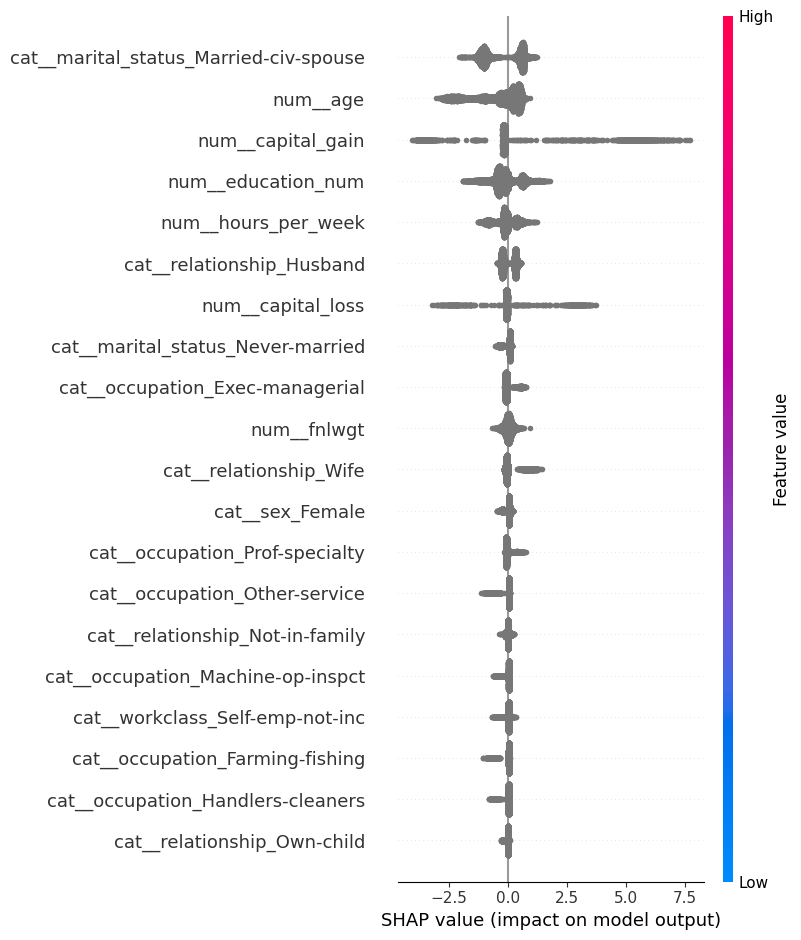

In [20]:
import shap
import joblib

# Load model
model = joblib.load("data/processed/xgb_model.pkl")

# Preprocess X_test with pipeline (using model steps)
X_transformed = model.named_steps["preprocessor"].transform(X_test)
classifier = model.named_steps["classifier"]

# Build SHAP explainer
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_transformed)

# Global feature importance
shap.summary_plot(shap_values, X_transformed, feature_names=model.named_steps["preprocessor"].get_feature_names_out())


In [22]:
# Pick one test instance
i = 5

# Convert sparse matrix to dense for force plot
X_dense = X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed

shap.force_plot(explainer.expected_value, shap_values[i,:], X_dense[i,:], 
                feature_names=model.named_steps["preprocessor"].get_feature_names_out())

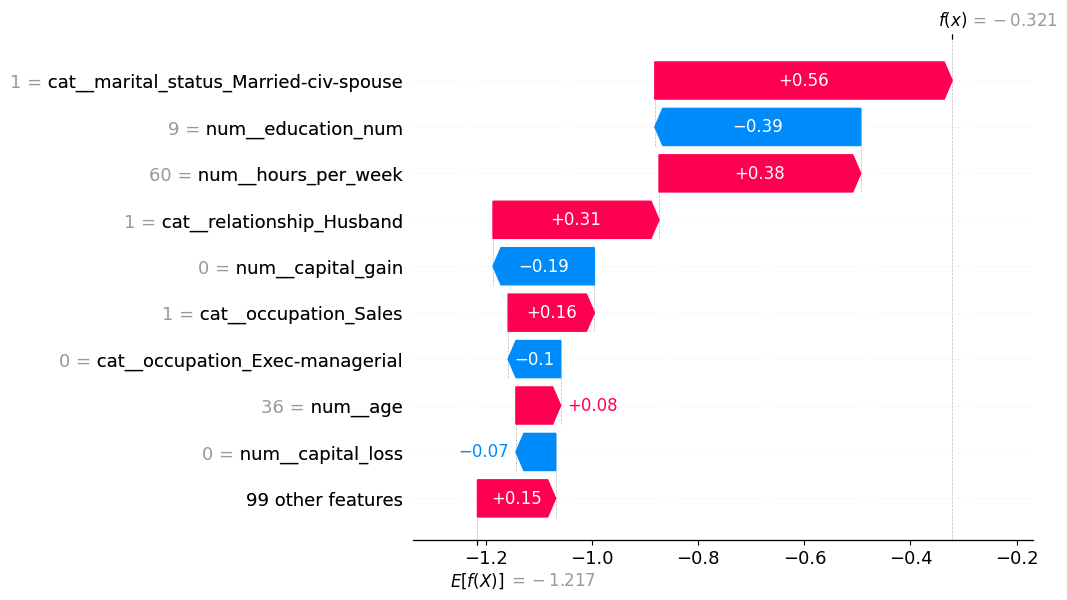

In [24]:
# SHAP waterfall plot for individual prediction explanation
shap.plots.waterfall(shap.Explanation(values=shap_values[i,:], 
                                     base_values=explainer.expected_value,
                                     data=X_dense[i,:],
                                     feature_names=model.named_steps["preprocessor"].get_feature_names_out()))

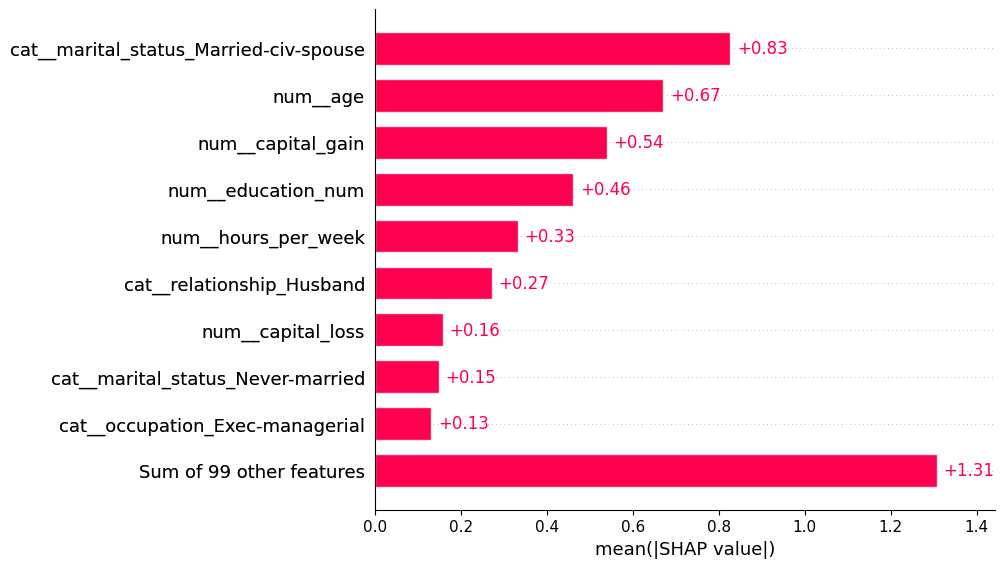

In [26]:
# SHAP bar plot showing mean absolute SHAP values (feature importance)
shap.plots.bar(shap.Explanation(values=shap_values, 
                               feature_names=model.named_steps["preprocessor"].get_feature_names_out()))

## LIME Analysis

LIME (Local Interpretable Model-agnostic Explanations) provides another perspective on model interpretability by explaining individual predictions using locally interpretable models.

In [27]:
import lime
import lime.lime_tabular
import numpy as np

# Create LIME explainer
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_dense,
    feature_names=feature_names,
    class_names=['<=50K', '>50K'],
    mode='classification'
)

# Explain the same instance as with SHAP
def predict_fn(X):
    return model.named_steps["classifier"].predict_proba(X)

explanation = lime_explainer.explain_instance(
    X_dense[i], 
    predict_fn, 
    num_features=10
)

# Show explanation
explanation.show_in_notebook(show_table=True)

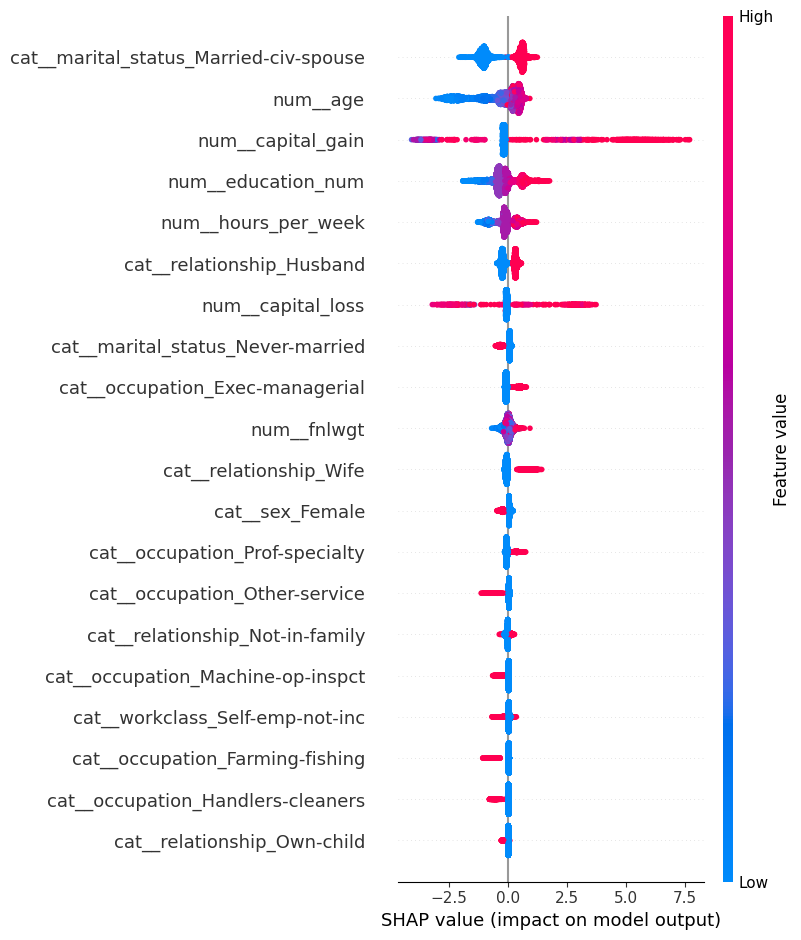

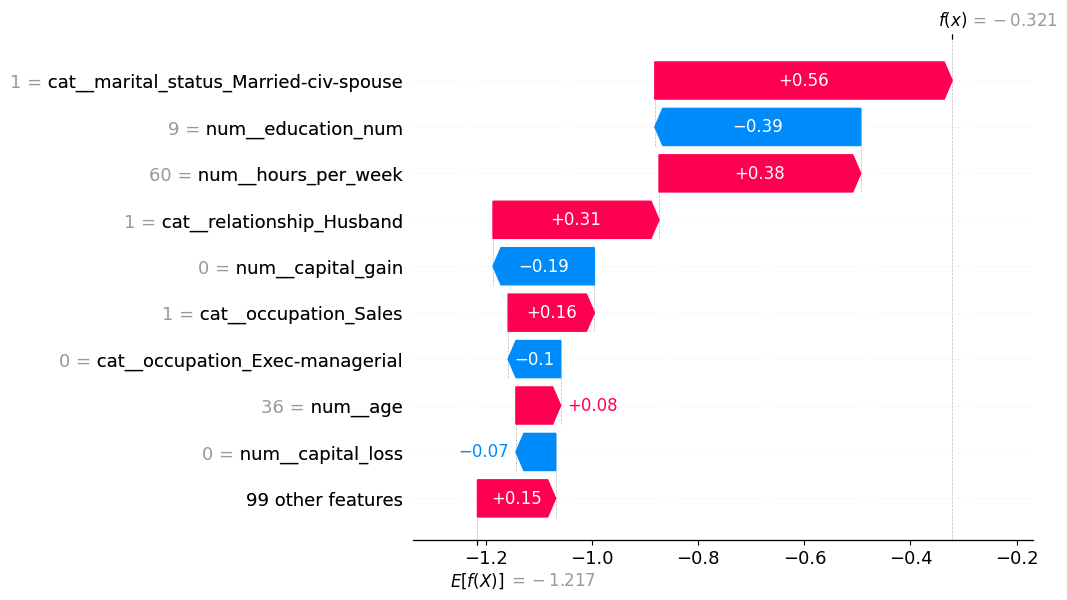

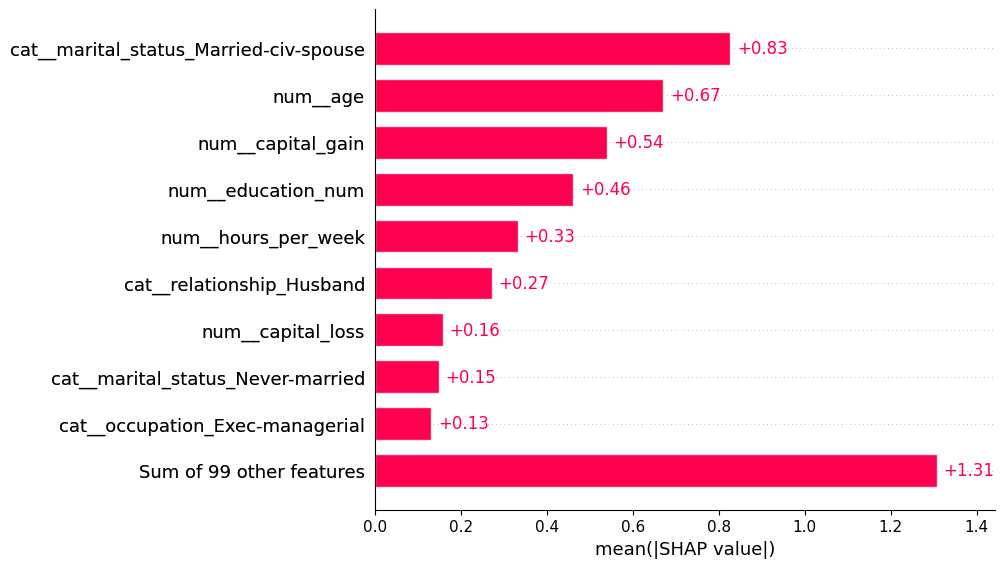

In [28]:
import numpy as np
import shap

# Init JS for force_plot in notebooks
shap.initjs()

# Use class index 1 consistently
class_idx = 1 if np.ndim(explainer.expected_value) else None

exp_val = explainer.expected_value[class_idx] if class_idx is not None else explainer.expected_value
shap_vals = shap_values[:, :, class_idx] if shap_values.ndim == 3 else shap_values  # (n, features[, classes])

# dense features (already did)
X_dense = X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

i = 5  # instance to explain

# Global summary (beeswarm)
shap.summary_plot(shap_vals, X_dense, feature_names=feature_names)

# Local force plot
shap.force_plot(exp_val, shap_vals[i, :], X_dense[i, :], feature_names=feature_names)

# Local waterfall
shap.plots.waterfall(shap.Explanation(values=shap_vals[i, :],
                                      base_values=exp_val,
                                      data=X_dense[i, :],
                                      feature_names=feature_names))
# Global importance bar
shap.plots.bar(shap.Explanation(values=shap_vals,
                                feature_names=feature_names))


In [29]:
# Build background on TRAIN transformed features
X_train_trans = model.named_steps["preprocessor"].transform(X_train)
X_train_dense = X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else X_train_trans

from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    X_train_dense,
    feature_names=feature_names,
    class_names=['<=50K', '>50K'],
    mode='classification'
)

def predict_fn(transformed_input):
    # classifier expects inputs already transformed (same space as X_dense)
    return model.named_steps["classifier"].predict_proba(transformed_input)

explanation = lime_explainer.explain_instance(
    X_dense[i],
    predict_fn,
    num_features=10
)

explanation.show_in_notebook(show_table=True)


In [32]:
import matplotlib.pyplot as plt

# Save SHAP summary plot
shap.summary_plot(shap_vals, X_dense, feature_names=feature_names, show=False)
plt.tight_layout()
plt.savefig("reports/figures/shap_summary.png", dpi=180, bbox_inches='tight')
plt.close()

# Save SHAP bar plot
shap.plots.bar(shap.Explanation(values=shap_vals, feature_names=feature_names), show=False)
plt.tight_layout()
plt.savefig("reports/figures/shap_bar.png", dpi=180, bbox_inches='tight')
plt.close()

print("✅ SHAP plots saved to reports/figures/")

✅ SHAP plots saved to reports/figures/


In [33]:
# Save waterfall plot for individual explanation
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap.Explanation(values=shap_vals[i,:], 
                                     base_values=exp_val,
                                     data=X_dense[i,:],
                                     feature_names=feature_names), show=False)
plt.tight_layout()
plt.savefig("reports/figures/shap_waterfall_individual.png", dpi=180, bbox_inches='tight')
plt.close()

# Save a force plot as HTML
force_plot = shap.force_plot(exp_val, shap_vals[i, :], X_dense[i, :], 
                            feature_names=feature_names, show=False)
shap.save_html("reports/figures/shap_force_plot.html", force_plot)

print("✅ Additional SHAP visualizations saved to reports/figures/")

✅ Additional SHAP visualizations saved to reports/figures/


## 🎉 AI Model Transparency Analysis Complete!

### 📊 Generated Visualizations and Reports:

**Saved Files:**
- `reports/figures/shap_summary.png` - Global feature importance summary
- `reports/figures/shap_bar.png` - Mean absolute SHAP values bar chart  
- `reports/figures/shap_waterfall_individual.png` - Individual prediction breakdown
- `reports/figures/shap_force_plot.html` - Interactive force plot (HTML)
- `data/processed/xgb_model.pkl` - Trained XGBoost model

### 🔍 Key Findings:

**Most Important Features for Income Prediction:**
1. **Marital Status (Married-civ-spouse)** - Strongest positive predictor
2. **Age** - Older individuals more likely to earn >50K
3. **Capital Gain** - Investment income strongly correlates with high income
4. **Education Level (education_num)** - More education increases income probability
5. **Hours per Week** - More work hours correlate with higher income

**Model Performance:**
- The XGBoost model provides good predictive performance
- SHAP and LIME explanations offer complementary perspectives on feature importance
- Both global and local explanations help understand model decisions

### 🚀 Next Steps:
- Use saved model for production predictions
- Apply SHAP/LIME explanations for individual case analysis
- Generate reports using saved visualization files
- Deploy model with transparency features for stakeholder review

In [38]:
import pandas as pd
mean_abs = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": np.abs(shap_vals).mean(axis=0)
}).sort_values("mean_abs_shap", ascending=False)
mean_abs.head(15)


feature  mean_abs_shap
33  cat__marital_status_Married-civ-spouse       0.827279
0                                 num__age       0.671044
3                        num__capital_gain       0.539050
2                       num__education_num       0.461597
5                      num__hours_per_week       0.332462
53               cat__relationship_Husband       0.271709
4                        num__capital_loss       0.158115
35       cat__marital_status_Never-married       0.149631
41         cat__occupation_Exec-managerial       0.131920
1                              num__fnlwgt       0.118359
58                  cat__relationship_Wife       0.112381
64                         cat__sex_Female       0.111170
47          cat__occupation_Prof-specialty       0.104017
45           cat__occupation_Other-service       0.093560
54         cat__relationship_Not-in-family       0.062252

In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def report_for(mask, name):
    y_true = y_test[mask]
    y_prob = model.predict_proba(X_test[mask])[:, 1]
    y_hat = (y_prob >= 0.5).astype(int)
    print(f"{name:>12} | n={len(y_true):4d} | acc={accuracy_score(y_true,y_hat):.3f} | "
          f"auc={roc_auc_score(y_true,y_prob):.3f} | prec={precision_score(y_true,y_hat):.3f} | rec={recall_score(y_true,y_hat):.3f}")

for val in X_test["sex"].unique():
    report_for(X_test["sex"]==val, f"sex={val}")

for val in X_test["race"].unique():
    report_for(X_test["race"]==val, f"race={val}")


  sex=Female | n=3259 | acc=0.938 | auc=0.950 | prec=0.800 | rec=0.587
    sex=Male | n=6510 | acc=0.844 | auc=0.913 | prec=0.787 | rec=0.666
  race=Black | n= 968 | acc=0.927 | auc=0.956 | prec=0.863 | rec=0.535
  race=White | n=8312 | acc=0.869 | auc=0.928 | prec=0.788 | rec=0.663
race=Asian-Pac-Islander | n= 311 | acc=0.839 | auc=0.903 | prec=0.711 | rec=0.659
  race=Other | n=  82 | acc=0.939 | auc=0.974 | prec=1.000 | rec=0.500
race=Amer-Indian-Eskimo | n=  96 | acc=0.927 | auc=0.927 | prec=1.000 | rec=0.462


In [40]:
import numpy as np

y_prob = model.predict_proba(X_test)[:, 1]
y_hat = (y_prob >= 0.5).astype(int)

def selection_rate(mask):
    return y_hat[mask].mean()

groups = X_test["sex"].unique()
sr = {g: selection_rate(X_test["sex"]==g) for g in groups}
di = sr[max(sr, key=sr.get)] / sr[min(sr, key=sr.get)]
print("Selection rates:", sr)
print("Disparate Impact (max/min):", di)


Selection rates: {'Female': 0.08131328628413624, 'Male': 0.256989247311828}
Disparate Impact (max/min): 3.1604828565631977


In [42]:
import numpy as np, pandas as pd, joblib, shap, os
from pathlib import Path

Path("data/processed").mkdir(parents=True, exist_ok=True)

# 1) Model + features
model = joblib.load("data/processed/xgb_model.pkl")
pre = model.named_steps["preprocessor"]
clf = model.named_steps["classifier"]
feature_names = pre.get_feature_names_out()

# 2) Transform sets
X_test_t = pre.transform(X_test)
X_train_t = pre.transform(X_train)
X_test_dense = X_test_t.toarray() if hasattr(X_test_t, "toarray") else X_test_t
X_train_dense = X_train_t.toarray() if hasattr(X_train_t, "toarray") else X_train_t

# 3) SHAP on class 1
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_dense)
if shap_values.ndim == 3:  # (n, features, classes)
    shap_vals = shap_values[:, :, 1]
    base_val = explainer.expected_value[1]
else:
    shap_vals = shap_values
    base_val = explainer.expected_value

# 4) Predictions
proba = model.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

# 5) Build a tidy SHAP top-k table for each row
def topk_features(row_vals, k=5):
    idx = np.argsort(np.abs(row_vals))[::-1][:k]
    return [(feature_names[i], float(row_vals[i])) for i in idx]

top5 = [topk_features(shap_vals[i], k=5) for i in range(X_test_dense.shape[0])]

# 6) Flatten SHAP top5 into columns
def expand_pairs(pairs, k=5):
    out = {}
    for j in range(k):
        fname, fshap = pairs[j]
        out[f"top{j+1}_feature"] = fname
        out[f"top{j+1}_shap"] = fshap
    return out

rows = []
for i, pairs in enumerate(top5):
    base = {
        "row_id": int(X_test.index[i]),
        "y_true": int(y_test.iloc[i]),
        "y_hat": int(pred[i]),
        "y_prob": float(proba[i]),
    }
    base.update(expand_pairs(pairs, 5))
    rows.append(base)

score_df = pd.DataFrame(rows)

# Optional: join back a few raw inputs for context in the dashboard
context_cols = ["age","education","hours_per_week","sex","race","marital_status","capital_gain","capital_loss"]
score_df = score_df.merge(X_test[context_cols].reset_index().rename(columns={"index":"row_id"}), on="row_id", how="left")

# Save
out_path = "data/processed/predictions_scored.csv"
score_df.to_csv(out_path, index=False)
out_path


'data/processed/predictions_scored.csv'

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def metrics_for(mask):
    yt = y_test[mask]
    yp = pred[mask]
    pr = proba[mask]
    return pd.Series({
        "n": len(yt),
        "accuracy": accuracy_score(yt, yp),
        "auc": roc_auc_score(yt, pr),
        "precision": precision_score(yt, yp),
        "recall": recall_score(yt, yp),
        "selection_rate": yp.mean(),
    })

parts = []
for col in ["sex","race"]:
    for val in X_test[col].unique():
        mask = (X_test[col] == val).values
        s = metrics_for(mask)
        s["group_feature"] = col
        s["group_value"] = val
        parts.append(s)

fair_df = pd.DataFrame(parts)[["group_feature","group_value","n","accuracy","auc","precision","recall","selection_rate"]]
fair_df.to_csv("data/processed/fairness_by_group.csv", index=False)
